In [1]:
%%time
from keras.datasets import mnist
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

/home/hskimim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/hskimim/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/hskimim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/hskimim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/hskimim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 8a61469f7ea1b51cbae51d4f78837e45 so we will re-download the data.
11493376/11490434 [==============================] - 48s 4us/step
CPU times: user 2.8 s, sys: 1.2 s, total: 4 s
Wall time: 50.9 s


In [2]:
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


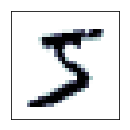

In [6]:
import matplotlib.pylab as plt
import matplotlib as mpl
plt.figure(figsize=(2, 2))
plt.imshow(X_train0[0], cmap=mpl.cm.bone_r)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()


In [7]:
X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

(60000, 784) float32


In [8]:
y_train0[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [12]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(0)

model = Sequential()
model.add(Dense(15, input_dim=784, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

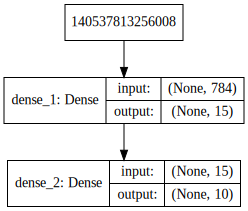

In [13]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [15]:
l1 = model.layers[0]
l2 = model.layers[1]

In [16]:
l1.name, type(l1), l1.output_shape, l1.activation.__name__, l1.count_params()

('dense_1', keras.layers.core.Dense, (None, 15), 'sigmoid', 11775)

In [17]:
l2.name, type(l1), l2.output_shape, l2.activation.__name__, l2.count_params()

('dense_2', keras.layers.core.Dense, (None, 10), 'sigmoid', 160)

In [18]:
%%time
hist = model.fit(X_train, Y_train, 
                 epochs=30, batch_size=100, 
                 validation_data=(X_test, Y_test), 
                 verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 1s - loss: 0.1019 - acc: 0.2441 - val_loss: 0.0864 - val_acc: 0.3213
Epoch 2/30
 - 1s - loss: 0.0845 - acc: 0.3922 - val_loss: 0.0821 - val_acc: 0.4409
Epoch 3/30
 - 1s - loss: 0.0796 - acc: 0.4997 - val_loss: 0.0765 - val_acc: 0.5340
Epoch 4/30
 - 1s - loss: 0.0740 - acc: 0.5620 - val_loss: 0.0707 - val_acc: 0.5852
Epoch 5/30
 - 1s - loss: 0.0682 - acc: 0.6149 - val_loss: 0.0649 - val_acc: 0.6523
Epoch 6/30
 - 1s - loss: 0.0625 - acc: 0.6759 - val_loss: 0.0594 - val_acc: 0.6998
Epoch 7/30
 - 1s - loss: 0.0576 - acc: 0.7101 - val_loss: 0.0551 - val_acc: 0.7317
Epoch 8/30
 - 1s - loss: 0.0537 - acc: 0.7325 - val_loss: 0.0516 - val_acc: 0.7485
Epoch 9/30
 - 1s - loss: 0.0505 - acc: 0.7474 - val_loss: 0.0486 - val_acc: 0.7638
Epoch 10/30
 - 1s - loss: 0.0478 - acc: 0.7608 - val_loss: 0.0461 - val_acc: 0.7759
Epoch 11/30
 - 1s - loss: 0.0455 - acc: 0.7739 - val_loss: 0.0439 - val_acc: 0.7893
Epoch 12/30
 - 1s - loss: 0.0435 - 

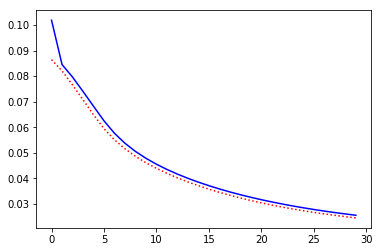

In [24]:
plt.plot(hist.history['loss'], 'b-', label="loss")
plt.plot(hist.history['val_loss'], 'r:', label="val_loss")
plt.show()

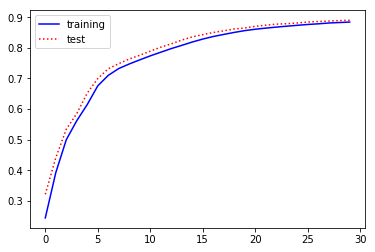

In [23]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [25]:
w1 = l1.get_weights()
w1[0].shape, w1[1].shape

((784, 15), (15,))

In [26]:
w2 = l2.get_weights()
w2[0].shape, w2[1].shape


((15, 10), (10,))

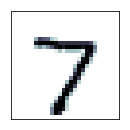

In [27]:
plt.figure(figsize=(2, 2))
plt.imshow(X_test0[0], cmap=mpl.cm.bone_r)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [28]:
model.predict(X_test[:1, :])

array([[0.01766383, 0.01915541, 0.01319776, 0.02870603, 0.01252176,
        0.05721262, 0.01232652, 0.9418624 , 0.00762724, 0.05534881]],
      dtype=float32)

In [29]:
model.predict_classes(X_test[:1, :], verbose=0)

array([7])

In [81]:
from sklearn.datasets import load_iris
iris = load_iris()
train_X = iris.data
train_y = iris.target

In [82]:
train_X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [83]:
train_y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [84]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
train_y = lb.fit_transform(train_y)

In [88]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(0)
model = Sequential()
model.add(Dense(10, input_dim=4, activation='sigmoid'))
model.add(Dense(3, activation='sigmoid'))
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=['accuracy'])

In [89]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [90]:
%%time
hist =model.fit(train_X, train_y, epochs=5000, batch_size=100,verbose=2)

Epoch 1/5000
 - 0s - loss: 0.2580 - acc: 0.3333
Epoch 2/5000
 - 0s - loss: 0.2511 - acc: 0.3333
Epoch 3/5000
 - 0s - loss: 0.2457 - acc: 0.3333
Epoch 4/5000
 - 0s - loss: 0.2415 - acc: 0.3333
Epoch 5/5000
 - 0s - loss: 0.2382 - acc: 0.3333
Epoch 6/5000
 - 0s - loss: 0.2354 - acc: 0.3333
Epoch 7/5000
 - 0s - loss: 0.2329 - acc: 0.3333
Epoch 8/5000
 - 0s - loss: 0.2310 - acc: 0.3333
Epoch 9/5000
 - 0s - loss: 0.2294 - acc: 0.3333
Epoch 10/5000
 - 0s - loss: 0.2279 - acc: 0.3333
Epoch 11/5000
 - 0s - loss: 0.2265 - acc: 0.3333
Epoch 12/5000
 - 0s - loss: 0.2253 - acc: 0.3333
Epoch 13/5000
 - 0s - loss: 0.2243 - acc: 0.3333
Epoch 14/5000
 - 0s - loss: 0.2236 - acc: 0.3333
Epoch 15/5000
 - 0s - loss: 0.2226 - acc: 0.3333
Epoch 16/5000
 - 0s - loss: 0.2219 - acc: 0.3333
Epoch 17/5000
 - 0s - loss: 0.2212 - acc: 0.3600
Epoch 18/5000
 - 0s - loss: 0.2205 - acc: 0.3733
Epoch 19/5000
 - 0s - loss: 0.2199 - acc: 0.4000
Epoch 20/5000
 - 0s - loss: 0.2193 - acc: 0.4333
Epoch 21/5000
 - 0s - loss: 0

 - 0s - loss: 0.1417 - acc: 0.6667
Epoch 168/5000
 - 0s - loss: 0.1414 - acc: 0.6867
Epoch 169/5000
 - 0s - loss: 0.1410 - acc: 0.6867
Epoch 170/5000
 - 0s - loss: 0.1407 - acc: 0.6867
Epoch 171/5000
 - 0s - loss: 0.1404 - acc: 0.6933
Epoch 172/5000
 - 0s - loss: 0.1401 - acc: 0.6800
Epoch 173/5000
 - 0s - loss: 0.1396 - acc: 0.7000
Epoch 174/5000
 - 0s - loss: 0.1393 - acc: 0.7067
Epoch 175/5000
 - 0s - loss: 0.1390 - acc: 0.7200
Epoch 176/5000
 - 0s - loss: 0.1388 - acc: 0.7200
Epoch 177/5000
 - 0s - loss: 0.1384 - acc: 0.7067
Epoch 178/5000
 - 0s - loss: 0.1380 - acc: 0.6933
Epoch 179/5000
 - 0s - loss: 0.1377 - acc: 0.7067
Epoch 180/5000
 - 0s - loss: 0.1374 - acc: 0.7067
Epoch 181/5000
 - 0s - loss: 0.1372 - acc: 0.7067
Epoch 182/5000
 - 0s - loss: 0.1368 - acc: 0.7267
Epoch 183/5000
 - 0s - loss: 0.1365 - acc: 0.7333
Epoch 184/5000
 - 0s - loss: 0.1362 - acc: 0.7200
Epoch 185/5000
 - 0s - loss: 0.1359 - acc: 0.7067
Epoch 186/5000
 - 0s - loss: 0.1356 - acc: 0.7067
Epoch 187/5000


 - 0s - loss: 0.1098 - acc: 0.8667
Epoch 332/5000
 - 0s - loss: 0.1097 - acc: 0.9067
Epoch 333/5000
 - 0s - loss: 0.1096 - acc: 0.9000
Epoch 334/5000
 - 0s - loss: 0.1095 - acc: 0.9000
Epoch 335/5000
 - 0s - loss: 0.1094 - acc: 0.8867
Epoch 336/5000
 - 0s - loss: 0.1093 - acc: 0.9067
Epoch 337/5000
 - 0s - loss: 0.1092 - acc: 0.8867
Epoch 338/5000
 - 0s - loss: 0.1090 - acc: 0.9133
Epoch 339/5000
 - 0s - loss: 0.1089 - acc: 0.9133
Epoch 340/5000
 - 0s - loss: 0.1088 - acc: 0.9133
Epoch 341/5000
 - 0s - loss: 0.1087 - acc: 0.9067
Epoch 342/5000
 - 0s - loss: 0.1086 - acc: 0.9067
Epoch 343/5000
 - 0s - loss: 0.1085 - acc: 0.9133
Epoch 344/5000
 - 0s - loss: 0.1083 - acc: 0.9067
Epoch 345/5000
 - 0s - loss: 0.1082 - acc: 0.9067
Epoch 346/5000
 - 0s - loss: 0.1081 - acc: 0.9133
Epoch 347/5000
 - 0s - loss: 0.1080 - acc: 0.9067
Epoch 348/5000
 - 0s - loss: 0.1079 - acc: 0.9133
Epoch 349/5000
 - 0s - loss: 0.1078 - acc: 0.9067
Epoch 350/5000
 - 0s - loss: 0.1078 - acc: 0.8867
Epoch 351/5000


 - 0s - loss: 0.0924 - acc: 0.9667
Epoch 496/5000
 - 0s - loss: 0.0922 - acc: 0.9533
Epoch 497/5000
 - 0s - loss: 0.0922 - acc: 0.9533
Epoch 498/5000
 - 0s - loss: 0.0920 - acc: 0.9667
Epoch 499/5000
 - 0s - loss: 0.0919 - acc: 0.9667
Epoch 500/5000
 - 0s - loss: 0.0918 - acc: 0.9667
Epoch 501/5000
 - 0s - loss: 0.0917 - acc: 0.9667
Epoch 502/5000
 - 0s - loss: 0.0916 - acc: 0.9600
Epoch 503/5000
 - 0s - loss: 0.0915 - acc: 0.9533
Epoch 504/5000
 - 0s - loss: 0.0916 - acc: 0.9533
Epoch 505/5000
 - 0s - loss: 0.0913 - acc: 0.9733
Epoch 506/5000
 - 0s - loss: 0.0912 - acc: 0.9733
Epoch 507/5000
 - 0s - loss: 0.0912 - acc: 0.9600
Epoch 508/5000
 - 0s - loss: 0.0910 - acc: 0.9733
Epoch 509/5000
 - 0s - loss: 0.0908 - acc: 0.9667
Epoch 510/5000
 - 0s - loss: 0.0908 - acc: 0.9667
Epoch 511/5000
 - 0s - loss: 0.0908 - acc: 0.9667
Epoch 512/5000
 - 0s - loss: 0.0906 - acc: 0.9533
Epoch 513/5000
 - 0s - loss: 0.0904 - acc: 0.9600
Epoch 514/5000
 - 0s - loss: 0.0903 - acc: 0.9600
Epoch 515/5000


 - 0s - loss: 0.0756 - acc: 0.9733
Epoch 660/5000
 - 0s - loss: 0.0756 - acc: 0.9733
Epoch 661/5000
 - 0s - loss: 0.0755 - acc: 0.9733
Epoch 662/5000
 - 0s - loss: 0.0753 - acc: 0.9733
Epoch 663/5000
 - 0s - loss: 0.0753 - acc: 0.9733
Epoch 664/5000
 - 0s - loss: 0.0751 - acc: 0.9733
Epoch 665/5000
 - 0s - loss: 0.0751 - acc: 0.9733
Epoch 666/5000
 - 0s - loss: 0.0749 - acc: 0.9733
Epoch 667/5000
 - 0s - loss: 0.0751 - acc: 0.9733
Epoch 668/5000
 - 0s - loss: 0.0748 - acc: 0.9733
Epoch 669/5000
 - 0s - loss: 0.0747 - acc: 0.9733
Epoch 670/5000
 - 0s - loss: 0.0746 - acc: 0.9733
Epoch 671/5000
 - 0s - loss: 0.0744 - acc: 0.9733
Epoch 672/5000
 - 0s - loss: 0.0744 - acc: 0.9733
Epoch 673/5000
 - 0s - loss: 0.0743 - acc: 0.9733
Epoch 674/5000
 - 0s - loss: 0.0742 - acc: 0.9733
Epoch 675/5000
 - 0s - loss: 0.0741 - acc: 0.9733
Epoch 676/5000
 - 0s - loss: 0.0740 - acc: 0.9733
Epoch 677/5000
 - 0s - loss: 0.0739 - acc: 0.9733
Epoch 678/5000
 - 0s - loss: 0.0738 - acc: 0.9733
Epoch 679/5000


 - 0s - loss: 0.0606 - acc: 0.9733
Epoch 824/5000
 - 0s - loss: 0.0607 - acc: 0.9733
Epoch 825/5000
 - 0s - loss: 0.0605 - acc: 0.9733
Epoch 826/5000
 - 0s - loss: 0.0606 - acc: 0.9733
Epoch 827/5000
 - 0s - loss: 0.0606 - acc: 0.9667
Epoch 828/5000
 - 0s - loss: 0.0603 - acc: 0.9733
Epoch 829/5000
 - 0s - loss: 0.0602 - acc: 0.9733
Epoch 830/5000
 - 0s - loss: 0.0602 - acc: 0.9733
Epoch 831/5000
 - 0s - loss: 0.0600 - acc: 0.9733
Epoch 832/5000
 - 0s - loss: 0.0599 - acc: 0.9733
Epoch 833/5000
 - 0s - loss: 0.0598 - acc: 0.9733
Epoch 834/5000
 - 0s - loss: 0.0598 - acc: 0.9733
Epoch 835/5000
 - 0s - loss: 0.0597 - acc: 0.9733
Epoch 836/5000
 - 0s - loss: 0.0595 - acc: 0.9733
Epoch 837/5000
 - 0s - loss: 0.0596 - acc: 0.9733
Epoch 838/5000
 - 0s - loss: 0.0594 - acc: 0.9733
Epoch 839/5000
 - 0s - loss: 0.0598 - acc: 0.9733
Epoch 840/5000
 - 0s - loss: 0.0594 - acc: 0.9667
Epoch 841/5000
 - 0s - loss: 0.0592 - acc: 0.9733
Epoch 842/5000
 - 0s - loss: 0.0591 - acc: 0.9733
Epoch 843/5000


 - 0s - loss: 0.0488 - acc: 0.9733
Epoch 988/5000
 - 0s - loss: 0.0489 - acc: 0.9800
Epoch 989/5000
 - 0s - loss: 0.0487 - acc: 0.9800
Epoch 990/5000
 - 0s - loss: 0.0486 - acc: 0.9800
Epoch 991/5000
 - 0s - loss: 0.0487 - acc: 0.9733
Epoch 992/5000
 - 0s - loss: 0.0486 - acc: 0.9733
Epoch 993/5000
 - 0s - loss: 0.0485 - acc: 0.9733
Epoch 994/5000
 - 0s - loss: 0.0485 - acc: 0.9733
Epoch 995/5000
 - 0s - loss: 0.0486 - acc: 0.9800
Epoch 996/5000
 - 0s - loss: 0.0483 - acc: 0.9733
Epoch 997/5000
 - 0s - loss: 0.0482 - acc: 0.9733
Epoch 998/5000
 - 0s - loss: 0.0481 - acc: 0.9733
Epoch 999/5000
 - 0s - loss: 0.0481 - acc: 0.9733
Epoch 1000/5000
 - 0s - loss: 0.0481 - acc: 0.9733
Epoch 1001/5000
 - 0s - loss: 0.0480 - acc: 0.9733
Epoch 1002/5000
 - 0s - loss: 0.0479 - acc: 0.9733
Epoch 1003/5000
 - 0s - loss: 0.0479 - acc: 0.9800
Epoch 1004/5000
 - 0s - loss: 0.0479 - acc: 0.9733
Epoch 1005/5000
 - 0s - loss: 0.0477 - acc: 0.9733
Epoch 1006/5000
 - 0s - loss: 0.0477 - acc: 0.9733
Epoch 10

 - 0s - loss: 0.0404 - acc: 0.9800
Epoch 1149/5000
 - 0s - loss: 0.0406 - acc: 0.9800
Epoch 1150/5000
 - 0s - loss: 0.0404 - acc: 0.9733
Epoch 1151/5000
 - 0s - loss: 0.0403 - acc: 0.9800
Epoch 1152/5000
 - 0s - loss: 0.0403 - acc: 0.9733
Epoch 1153/5000
 - 0s - loss: 0.0402 - acc: 0.9800
Epoch 1154/5000
 - 0s - loss: 0.0403 - acc: 0.9800
Epoch 1155/5000
 - 0s - loss: 0.0401 - acc: 0.9800
Epoch 1156/5000
 - 0s - loss: 0.0400 - acc: 0.9800
Epoch 1157/5000
 - 0s - loss: 0.0400 - acc: 0.9800
Epoch 1158/5000
 - 0s - loss: 0.0399 - acc: 0.9733
Epoch 1159/5000
 - 0s - loss: 0.0399 - acc: 0.9800
Epoch 1160/5000
 - 0s - loss: 0.0400 - acc: 0.9800
Epoch 1161/5000
 - 0s - loss: 0.0398 - acc: 0.9800
Epoch 1162/5000
 - 0s - loss: 0.0398 - acc: 0.9800
Epoch 1163/5000
 - 0s - loss: 0.0400 - acc: 0.9733
Epoch 1164/5000
 - 0s - loss: 0.0398 - acc: 0.9800
Epoch 1165/5000
 - 0s - loss: 0.0397 - acc: 0.9800
Epoch 1166/5000
 - 0s - loss: 0.0396 - acc: 0.9733
Epoch 1167/5000
 - 0s - loss: 0.0397 - acc: 0.9

Epoch 1309/5000
 - 0s - loss: 0.0344 - acc: 0.9800
Epoch 1310/5000
 - 0s - loss: 0.0344 - acc: 0.9800
Epoch 1311/5000
 - 0s - loss: 0.0344 - acc: 0.9800
Epoch 1312/5000
 - 0s - loss: 0.0344 - acc: 0.9800
Epoch 1313/5000
 - 0s - loss: 0.0344 - acc: 0.9800
Epoch 1314/5000
 - 0s - loss: 0.0343 - acc: 0.9800
Epoch 1315/5000
 - 0s - loss: 0.0343 - acc: 0.9733
Epoch 1316/5000
 - 0s - loss: 0.0343 - acc: 0.9800
Epoch 1317/5000
 - 0s - loss: 0.0344 - acc: 0.9800
Epoch 1318/5000
 - 0s - loss: 0.0342 - acc: 0.9800
Epoch 1319/5000
 - 0s - loss: 0.0341 - acc: 0.9800
Epoch 1320/5000
 - 0s - loss: 0.0341 - acc: 0.9800
Epoch 1321/5000
 - 0s - loss: 0.0341 - acc: 0.9800
Epoch 1322/5000
 - 0s - loss: 0.0340 - acc: 0.9800
Epoch 1323/5000
 - 0s - loss: 0.0341 - acc: 0.9800
Epoch 1324/5000
 - 0s - loss: 0.0340 - acc: 0.9800
Epoch 1325/5000
 - 0s - loss: 0.0340 - acc: 0.9800
Epoch 1326/5000
 - 0s - loss: 0.0339 - acc: 0.9800
Epoch 1327/5000
 - 0s - loss: 0.0339 - acc: 0.9800
Epoch 1328/5000
 - 0s - loss: 0

Epoch 1470/5000
 - 0s - loss: 0.0302 - acc: 0.9800
Epoch 1471/5000
 - 0s - loss: 0.0303 - acc: 0.9800
Epoch 1472/5000
 - 0s - loss: 0.0304 - acc: 0.9800
Epoch 1473/5000
 - 0s - loss: 0.0303 - acc: 0.9800
Epoch 1474/5000
 - 0s - loss: 0.0303 - acc: 0.9800
Epoch 1475/5000
 - 0s - loss: 0.0301 - acc: 0.9800
Epoch 1476/5000
 - 0s - loss: 0.0300 - acc: 0.9800
Epoch 1477/5000
 - 0s - loss: 0.0300 - acc: 0.9800
Epoch 1478/5000
 - 0s - loss: 0.0300 - acc: 0.9800
Epoch 1479/5000
 - 0s - loss: 0.0300 - acc: 0.9800
Epoch 1480/5000
 - 0s - loss: 0.0300 - acc: 0.9800
Epoch 1481/5000
 - 0s - loss: 0.0301 - acc: 0.9800
Epoch 1482/5000
 - 0s - loss: 0.0301 - acc: 0.9800
Epoch 1483/5000
 - 0s - loss: 0.0299 - acc: 0.9800
Epoch 1484/5000
 - 0s - loss: 0.0298 - acc: 0.9800
Epoch 1485/5000
 - 0s - loss: 0.0298 - acc: 0.9800
Epoch 1486/5000
 - 0s - loss: 0.0298 - acc: 0.9800
Epoch 1487/5000
 - 0s - loss: 0.0298 - acc: 0.9800
Epoch 1488/5000
 - 0s - loss: 0.0302 - acc: 0.9800
Epoch 1489/5000
 - 0s - loss: 0

Epoch 1631/5000
 - 0s - loss: 0.0270 - acc: 0.9800
Epoch 1632/5000
 - 0s - loss: 0.0272 - acc: 0.9800
Epoch 1633/5000
 - 0s - loss: 0.0271 - acc: 0.9800
Epoch 1634/5000
 - 0s - loss: 0.0273 - acc: 0.9800
Epoch 1635/5000
 - 0s - loss: 0.0272 - acc: 0.9800
Epoch 1636/5000
 - 0s - loss: 0.0271 - acc: 0.9800
Epoch 1637/5000
 - 0s - loss: 0.0271 - acc: 0.9800
Epoch 1638/5000
 - 0s - loss: 0.0269 - acc: 0.9800
Epoch 1639/5000
 - 0s - loss: 0.0270 - acc: 0.9800
Epoch 1640/5000
 - 0s - loss: 0.0269 - acc: 0.9800
Epoch 1641/5000
 - 0s - loss: 0.0269 - acc: 0.9800
Epoch 1642/5000
 - 0s - loss: 0.0270 - acc: 0.9800
Epoch 1643/5000
 - 0s - loss: 0.0269 - acc: 0.9800
Epoch 1644/5000
 - 0s - loss: 0.0268 - acc: 0.9800
Epoch 1645/5000
 - 0s - loss: 0.0268 - acc: 0.9800
Epoch 1646/5000
 - 0s - loss: 0.0268 - acc: 0.9800
Epoch 1647/5000
 - 0s - loss: 0.0268 - acc: 0.9800
Epoch 1648/5000
 - 0s - loss: 0.0268 - acc: 0.9800
Epoch 1649/5000
 - 0s - loss: 0.0268 - acc: 0.9800
Epoch 1650/5000
 - 0s - loss: 0

Epoch 1792/5000
 - 0s - loss: 0.0247 - acc: 0.9800
Epoch 1793/5000
 - 0s - loss: 0.0247 - acc: 0.9800
Epoch 1794/5000
 - 0s - loss: 0.0246 - acc: 0.9800
Epoch 1795/5000
 - 0s - loss: 0.0247 - acc: 0.9800
Epoch 1796/5000
 - 0s - loss: 0.0246 - acc: 0.9800
Epoch 1797/5000
 - 0s - loss: 0.0251 - acc: 0.9800
Epoch 1798/5000
 - 0s - loss: 0.0252 - acc: 0.9800
Epoch 1799/5000
 - 0s - loss: 0.0247 - acc: 0.9800
Epoch 1800/5000
 - 0s - loss: 0.0248 - acc: 0.9800
Epoch 1801/5000
 - 0s - loss: 0.0247 - acc: 0.9800
Epoch 1802/5000
 - 0s - loss: 0.0246 - acc: 0.9800
Epoch 1803/5000
 - 0s - loss: 0.0246 - acc: 0.9800
Epoch 1804/5000
 - 0s - loss: 0.0245 - acc: 0.9800
Epoch 1805/5000
 - 0s - loss: 0.0245 - acc: 0.9800
Epoch 1806/5000
 - 0s - loss: 0.0247 - acc: 0.9800
Epoch 1807/5000
 - 0s - loss: 0.0245 - acc: 0.9800
Epoch 1808/5000
 - 0s - loss: 0.0247 - acc: 0.9800
Epoch 1809/5000
 - 0s - loss: 0.0246 - acc: 0.9800
Epoch 1810/5000
 - 0s - loss: 0.0248 - acc: 0.9800
Epoch 1811/5000
 - 0s - loss: 0

Epoch 1953/5000
 - 0s - loss: 0.0228 - acc: 0.9800
Epoch 1954/5000
 - 0s - loss: 0.0229 - acc: 0.9800
Epoch 1955/5000
 - 0s - loss: 0.0229 - acc: 0.9800
Epoch 1956/5000
 - 0s - loss: 0.0228 - acc: 0.9800
Epoch 1957/5000
 - 0s - loss: 0.0228 - acc: 0.9800
Epoch 1958/5000
 - 0s - loss: 0.0231 - acc: 0.9800
Epoch 1959/5000
 - 0s - loss: 0.0229 - acc: 0.9800
Epoch 1960/5000
 - 0s - loss: 0.0230 - acc: 0.9800
Epoch 1961/5000
 - 0s - loss: 0.0229 - acc: 0.9800
Epoch 1962/5000
 - 0s - loss: 0.0228 - acc: 0.9800
Epoch 1963/5000
 - 0s - loss: 0.0228 - acc: 0.9800
Epoch 1964/5000
 - 0s - loss: 0.0229 - acc: 0.9800
Epoch 1965/5000
 - 0s - loss: 0.0228 - acc: 0.9800
Epoch 1966/5000
 - 0s - loss: 0.0229 - acc: 0.9800
Epoch 1967/5000
 - 0s - loss: 0.0234 - acc: 0.9733
Epoch 1968/5000
 - 0s - loss: 0.0229 - acc: 0.9800
Epoch 1969/5000
 - 0s - loss: 0.0228 - acc: 0.9800
Epoch 1970/5000
 - 0s - loss: 0.0227 - acc: 0.9800
Epoch 1971/5000
 - 0s - loss: 0.0227 - acc: 0.9800
Epoch 1972/5000
 - 0s - loss: 0

Epoch 2114/5000
 - 0s - loss: 0.0215 - acc: 0.9800
Epoch 2115/5000
 - 0s - loss: 0.0217 - acc: 0.9800
Epoch 2116/5000
 - 0s - loss: 0.0215 - acc: 0.9800
Epoch 2117/5000
 - 0s - loss: 0.0218 - acc: 0.9800
Epoch 2118/5000
 - 0s - loss: 0.0215 - acc: 0.9800
Epoch 2119/5000
 - 0s - loss: 0.0217 - acc: 0.9800
Epoch 2120/5000
 - 0s - loss: 0.0218 - acc: 0.9800
Epoch 2121/5000
 - 0s - loss: 0.0214 - acc: 0.9800
Epoch 2122/5000
 - 0s - loss: 0.0216 - acc: 0.9800
Epoch 2123/5000
 - 0s - loss: 0.0214 - acc: 0.9800
Epoch 2124/5000
 - 0s - loss: 0.0214 - acc: 0.9800
Epoch 2125/5000
 - 0s - loss: 0.0214 - acc: 0.9800
Epoch 2126/5000
 - 0s - loss: 0.0214 - acc: 0.9800
Epoch 2127/5000
 - 0s - loss: 0.0214 - acc: 0.9800
Epoch 2128/5000
 - 0s - loss: 0.0218 - acc: 0.9800
Epoch 2129/5000
 - 0s - loss: 0.0214 - acc: 0.9800
Epoch 2130/5000
 - 0s - loss: 0.0217 - acc: 0.9800
Epoch 2131/5000
 - 0s - loss: 0.0214 - acc: 0.9800
Epoch 2132/5000
 - 0s - loss: 0.0213 - acc: 0.9800
Epoch 2133/5000
 - 0s - loss: 0

Epoch 2275/5000
 - 0s - loss: 0.0203 - acc: 0.9800
Epoch 2276/5000
 - 0s - loss: 0.0204 - acc: 0.9800
Epoch 2277/5000
 - 0s - loss: 0.0203 - acc: 0.9800
Epoch 2278/5000
 - 0s - loss: 0.0203 - acc: 0.9800
Epoch 2279/5000
 - 0s - loss: 0.0204 - acc: 0.9800
Epoch 2280/5000
 - 0s - loss: 0.0203 - acc: 0.9800
Epoch 2281/5000
 - 0s - loss: 0.0202 - acc: 0.9800
Epoch 2282/5000
 - 0s - loss: 0.0203 - acc: 0.9800
Epoch 2283/5000
 - 0s - loss: 0.0206 - acc: 0.9800
Epoch 2284/5000
 - 0s - loss: 0.0203 - acc: 0.9800
Epoch 2285/5000
 - 0s - loss: 0.0203 - acc: 0.9800
Epoch 2286/5000
 - 0s - loss: 0.0202 - acc: 0.9800
Epoch 2287/5000
 - 0s - loss: 0.0202 - acc: 0.9800
Epoch 2288/5000
 - 0s - loss: 0.0203 - acc: 0.9800
Epoch 2289/5000
 - 0s - loss: 0.0203 - acc: 0.9800
Epoch 2290/5000
 - 0s - loss: 0.0203 - acc: 0.9800
Epoch 2291/5000
 - 0s - loss: 0.0203 - acc: 0.9800
Epoch 2292/5000
 - 0s - loss: 0.0204 - acc: 0.9800
Epoch 2293/5000
 - 0s - loss: 0.0202 - acc: 0.9800
Epoch 2294/5000
 - 0s - loss: 0

Epoch 2436/5000
 - 0s - loss: 0.0194 - acc: 0.9800
Epoch 2437/5000
 - 0s - loss: 0.0193 - acc: 0.9800
Epoch 2438/5000
 - 0s - loss: 0.0193 - acc: 0.9800
Epoch 2439/5000
 - 0s - loss: 0.0193 - acc: 0.9800
Epoch 2440/5000
 - 0s - loss: 0.0195 - acc: 0.9800
Epoch 2441/5000
 - 0s - loss: 0.0194 - acc: 0.9800
Epoch 2442/5000
 - 0s - loss: 0.0195 - acc: 0.9800
Epoch 2443/5000
 - 0s - loss: 0.0194 - acc: 0.9800
Epoch 2444/5000
 - 0s - loss: 0.0193 - acc: 0.9800
Epoch 2445/5000
 - 0s - loss: 0.0193 - acc: 0.9800
Epoch 2446/5000
 - 0s - loss: 0.0193 - acc: 0.9800
Epoch 2447/5000
 - 0s - loss: 0.0193 - acc: 0.9800
Epoch 2448/5000
 - 0s - loss: 0.0193 - acc: 0.9800
Epoch 2449/5000
 - 0s - loss: 0.0192 - acc: 0.9800
Epoch 2450/5000
 - 0s - loss: 0.0192 - acc: 0.9800
Epoch 2451/5000
 - 0s - loss: 0.0192 - acc: 0.9800
Epoch 2452/5000
 - 0s - loss: 0.0194 - acc: 0.9800
Epoch 2453/5000
 - 0s - loss: 0.0193 - acc: 0.9800
Epoch 2454/5000
 - 0s - loss: 0.0192 - acc: 0.9800
Epoch 2455/5000
 - 0s - loss: 0

Epoch 2597/5000
 - 0s - loss: 0.0185 - acc: 0.9800
Epoch 2598/5000
 - 0s - loss: 0.0186 - acc: 0.9800
Epoch 2599/5000
 - 0s - loss: 0.0185 - acc: 0.9800
Epoch 2600/5000
 - 0s - loss: 0.0188 - acc: 0.9800
Epoch 2601/5000
 - 0s - loss: 0.0185 - acc: 0.9800
Epoch 2602/5000
 - 0s - loss: 0.0188 - acc: 0.9800
Epoch 2603/5000
 - 0s - loss: 0.0187 - acc: 0.9800
Epoch 2604/5000
 - 0s - loss: 0.0187 - acc: 0.9800
Epoch 2605/5000
 - 0s - loss: 0.0186 - acc: 0.9800
Epoch 2606/5000
 - 0s - loss: 0.0186 - acc: 0.9800
Epoch 2607/5000
 - 0s - loss: 0.0186 - acc: 0.9800
Epoch 2608/5000
 - 0s - loss: 0.0185 - acc: 0.9800
Epoch 2609/5000
 - 0s - loss: 0.0185 - acc: 0.9800
Epoch 2610/5000
 - 0s - loss: 0.0185 - acc: 0.9800
Epoch 2611/5000
 - 0s - loss: 0.0184 - acc: 0.9800
Epoch 2612/5000
 - 0s - loss: 0.0184 - acc: 0.9800
Epoch 2613/5000
 - 0s - loss: 0.0184 - acc: 0.9800
Epoch 2614/5000
 - 0s - loss: 0.0189 - acc: 0.9800
Epoch 2615/5000
 - 0s - loss: 0.0187 - acc: 0.9800
Epoch 2616/5000
 - 0s - loss: 0

Epoch 2758/5000
 - 0s - loss: 0.0179 - acc: 0.9800
Epoch 2759/5000
 - 0s - loss: 0.0179 - acc: 0.9800
Epoch 2760/5000
 - 0s - loss: 0.0181 - acc: 0.9800
Epoch 2761/5000
 - 0s - loss: 0.0179 - acc: 0.9800
Epoch 2762/5000
 - 0s - loss: 0.0178 - acc: 0.9800
Epoch 2763/5000
 - 0s - loss: 0.0179 - acc: 0.9800
Epoch 2764/5000
 - 0s - loss: 0.0178 - acc: 0.9800
Epoch 2765/5000
 - 0s - loss: 0.0179 - acc: 0.9800
Epoch 2766/5000
 - 0s - loss: 0.0179 - acc: 0.9800
Epoch 2767/5000
 - 0s - loss: 0.0180 - acc: 0.9800
Epoch 2768/5000
 - 0s - loss: 0.0179 - acc: 0.9800
Epoch 2769/5000
 - 0s - loss: 0.0179 - acc: 0.9800
Epoch 2770/5000
 - 0s - loss: 0.0181 - acc: 0.9800
Epoch 2771/5000
 - 0s - loss: 0.0179 - acc: 0.9800
Epoch 2772/5000
 - 0s - loss: 0.0178 - acc: 0.9800
Epoch 2773/5000
 - 0s - loss: 0.0178 - acc: 0.9800
Epoch 2774/5000
 - 0s - loss: 0.0179 - acc: 0.9800
Epoch 2775/5000
 - 0s - loss: 0.0178 - acc: 0.9800
Epoch 2776/5000
 - 0s - loss: 0.0178 - acc: 0.9800
Epoch 2777/5000
 - 0s - loss: 0

Epoch 2919/5000
 - 0s - loss: 0.0174 - acc: 0.9800
Epoch 2920/5000
 - 0s - loss: 0.0175 - acc: 0.9800
Epoch 2921/5000
 - 0s - loss: 0.0172 - acc: 0.9800
Epoch 2922/5000
 - 0s - loss: 0.0172 - acc: 0.9800
Epoch 2923/5000
 - 0s - loss: 0.0173 - acc: 0.9800
Epoch 2924/5000
 - 0s - loss: 0.0175 - acc: 0.9800
Epoch 2925/5000
 - 0s - loss: 0.0173 - acc: 0.9800
Epoch 2926/5000
 - 0s - loss: 0.0172 - acc: 0.9800
Epoch 2927/5000
 - 0s - loss: 0.0172 - acc: 0.9800
Epoch 2928/5000
 - 0s - loss: 0.0172 - acc: 0.9800
Epoch 2929/5000
 - 0s - loss: 0.0173 - acc: 0.9800
Epoch 2930/5000
 - 0s - loss: 0.0172 - acc: 0.9800
Epoch 2931/5000
 - 0s - loss: 0.0172 - acc: 0.9800
Epoch 2932/5000
 - 0s - loss: 0.0172 - acc: 0.9800
Epoch 2933/5000
 - 0s - loss: 0.0172 - acc: 0.9800
Epoch 2934/5000
 - 0s - loss: 0.0172 - acc: 0.9800
Epoch 2935/5000
 - 0s - loss: 0.0173 - acc: 0.9800
Epoch 2936/5000
 - 0s - loss: 0.0172 - acc: 0.9800
Epoch 2937/5000
 - 0s - loss: 0.0176 - acc: 0.9800
Epoch 2938/5000
 - 0s - loss: 0

Epoch 3080/5000
 - 0s - loss: 0.0168 - acc: 0.9800
Epoch 3081/5000
 - 0s - loss: 0.0170 - acc: 0.9800
Epoch 3082/5000
 - 0s - loss: 0.0168 - acc: 0.9800
Epoch 3083/5000
 - 0s - loss: 0.0167 - acc: 0.9800
Epoch 3084/5000
 - 0s - loss: 0.0167 - acc: 0.9800
Epoch 3085/5000
 - 0s - loss: 0.0168 - acc: 0.9800
Epoch 3086/5000
 - 0s - loss: 0.0168 - acc: 0.9800
Epoch 3087/5000
 - 0s - loss: 0.0167 - acc: 0.9800
Epoch 3088/5000
 - 0s - loss: 0.0167 - acc: 0.9800
Epoch 3089/5000
 - 0s - loss: 0.0170 - acc: 0.9800
Epoch 3090/5000
 - 0s - loss: 0.0168 - acc: 0.9800
Epoch 3091/5000
 - 0s - loss: 0.0167 - acc: 0.9800
Epoch 3092/5000
 - 0s - loss: 0.0167 - acc: 0.9800
Epoch 3093/5000
 - 0s - loss: 0.0167 - acc: 0.9800
Epoch 3094/5000
 - 0s - loss: 0.0167 - acc: 0.9800
Epoch 3095/5000
 - 0s - loss: 0.0169 - acc: 0.9800
Epoch 3096/5000
 - 0s - loss: 0.0168 - acc: 0.9800
Epoch 3097/5000
 - 0s - loss: 0.0168 - acc: 0.9800
Epoch 3098/5000
 - 0s - loss: 0.0168 - acc: 0.9800
Epoch 3099/5000
 - 0s - loss: 0

Epoch 3241/5000
 - 0s - loss: 0.0163 - acc: 0.9800
Epoch 3242/5000
 - 0s - loss: 0.0163 - acc: 0.9800
Epoch 3243/5000
 - 0s - loss: 0.0166 - acc: 0.9800
Epoch 3244/5000
 - 0s - loss: 0.0165 - acc: 0.9800
Epoch 3245/5000
 - 0s - loss: 0.0164 - acc: 0.9800
Epoch 3246/5000
 - 0s - loss: 0.0163 - acc: 0.9800
Epoch 3247/5000
 - 0s - loss: 0.0163 - acc: 0.9800
Epoch 3248/5000
 - 0s - loss: 0.0163 - acc: 0.9800
Epoch 3249/5000
 - 0s - loss: 0.0164 - acc: 0.9800
Epoch 3250/5000
 - 0s - loss: 0.0163 - acc: 0.9800
Epoch 3251/5000
 - 0s - loss: 0.0163 - acc: 0.9800
Epoch 3252/5000
 - 0s - loss: 0.0162 - acc: 0.9800
Epoch 3253/5000
 - 0s - loss: 0.0162 - acc: 0.9800
Epoch 3254/5000
 - 0s - loss: 0.0163 - acc: 0.9800
Epoch 3255/5000
 - 0s - loss: 0.0164 - acc: 0.9800
Epoch 3256/5000
 - 0s - loss: 0.0163 - acc: 0.9800
Epoch 3257/5000
 - 0s - loss: 0.0162 - acc: 0.9800
Epoch 3258/5000
 - 0s - loss: 0.0162 - acc: 0.9800
Epoch 3259/5000
 - 0s - loss: 0.0164 - acc: 0.9800
Epoch 3260/5000
 - 0s - loss: 0

Epoch 3402/5000
 - 0s - loss: 0.0159 - acc: 0.9800
Epoch 3403/5000
 - 0s - loss: 0.0163 - acc: 0.9800
Epoch 3404/5000
 - 0s - loss: 0.0159 - acc: 0.9800
Epoch 3405/5000
 - 0s - loss: 0.0159 - acc: 0.9800
Epoch 3406/5000
 - 0s - loss: 0.0159 - acc: 0.9800
Epoch 3407/5000
 - 0s - loss: 0.0161 - acc: 0.9800
Epoch 3408/5000
 - 0s - loss: 0.0159 - acc: 0.9800
Epoch 3409/5000
 - 0s - loss: 0.0159 - acc: 0.9800
Epoch 3410/5000
 - 0s - loss: 0.0159 - acc: 0.9800
Epoch 3411/5000
 - 0s - loss: 0.0159 - acc: 0.9800
Epoch 3412/5000
 - 0s - loss: 0.0160 - acc: 0.9800
Epoch 3413/5000
 - 0s - loss: 0.0159 - acc: 0.9800
Epoch 3414/5000
 - 0s - loss: 0.0158 - acc: 0.9800
Epoch 3415/5000
 - 0s - loss: 0.0160 - acc: 0.9800
Epoch 3416/5000
 - 0s - loss: 0.0159 - acc: 0.9800
Epoch 3417/5000
 - 0s - loss: 0.0159 - acc: 0.9800
Epoch 3418/5000
 - 0s - loss: 0.0158 - acc: 0.9800
Epoch 3419/5000
 - 0s - loss: 0.0158 - acc: 0.9800
Epoch 3420/5000
 - 0s - loss: 0.0159 - acc: 0.9800
Epoch 3421/5000
 - 0s - loss: 0

Epoch 3563/5000
 - 0s - loss: 0.0158 - acc: 0.9800
Epoch 3564/5000
 - 0s - loss: 0.0159 - acc: 0.9800
Epoch 3565/5000
 - 0s - loss: 0.0159 - acc: 0.9800
Epoch 3566/5000
 - 0s - loss: 0.0160 - acc: 0.9800
Epoch 3567/5000
 - 0s - loss: 0.0159 - acc: 0.9800
Epoch 3568/5000
 - 0s - loss: 0.0158 - acc: 0.9800
Epoch 3569/5000
 - 0s - loss: 0.0155 - acc: 0.9800
Epoch 3570/5000
 - 0s - loss: 0.0156 - acc: 0.9800
Epoch 3571/5000
 - 0s - loss: 0.0155 - acc: 0.9800
Epoch 3572/5000
 - 0s - loss: 0.0158 - acc: 0.9800
Epoch 3573/5000
 - 0s - loss: 0.0156 - acc: 0.9800
Epoch 3574/5000
 - 0s - loss: 0.0155 - acc: 0.9800
Epoch 3575/5000
 - 0s - loss: 0.0155 - acc: 0.9800
Epoch 3576/5000
 - 0s - loss: 0.0155 - acc: 0.9800
Epoch 3577/5000
 - 0s - loss: 0.0157 - acc: 0.9800
Epoch 3578/5000
 - 0s - loss: 0.0155 - acc: 0.9800
Epoch 3579/5000
 - 0s - loss: 0.0155 - acc: 0.9800
Epoch 3580/5000
 - 0s - loss: 0.0155 - acc: 0.9800
Epoch 3581/5000
 - 0s - loss: 0.0155 - acc: 0.9800
Epoch 3582/5000
 - 0s - loss: 0

Epoch 3724/5000
 - 0s - loss: 0.0153 - acc: 0.9800
Epoch 3725/5000
 - 0s - loss: 0.0152 - acc: 0.9800
Epoch 3726/5000
 - 0s - loss: 0.0152 - acc: 0.9800
Epoch 3727/5000
 - 0s - loss: 0.0153 - acc: 0.9800
Epoch 3728/5000
 - 0s - loss: 0.0152 - acc: 0.9800
Epoch 3729/5000
 - 0s - loss: 0.0154 - acc: 0.9800
Epoch 3730/5000
 - 0s - loss: 0.0153 - acc: 0.9800
Epoch 3731/5000
 - 0s - loss: 0.0155 - acc: 0.9800
Epoch 3732/5000
 - 0s - loss: 0.0153 - acc: 0.9800
Epoch 3733/5000
 - 0s - loss: 0.0154 - acc: 0.9800
Epoch 3734/5000
 - 0s - loss: 0.0155 - acc: 0.9800
Epoch 3735/5000
 - 0s - loss: 0.0154 - acc: 0.9800
Epoch 3736/5000
 - 0s - loss: 0.0153 - acc: 0.9800
Epoch 3737/5000
 - 0s - loss: 0.0152 - acc: 0.9800
Epoch 3738/5000
 - 0s - loss: 0.0152 - acc: 0.9800
Epoch 3739/5000
 - 0s - loss: 0.0152 - acc: 0.9800
Epoch 3740/5000
 - 0s - loss: 0.0152 - acc: 0.9800
Epoch 3741/5000
 - 0s - loss: 0.0152 - acc: 0.9800
Epoch 3742/5000
 - 0s - loss: 0.0152 - acc: 0.9800
Epoch 3743/5000
 - 0s - loss: 0

Epoch 3885/5000
 - 0s - loss: 0.0149 - acc: 0.9800
Epoch 3886/5000
 - 0s - loss: 0.0151 - acc: 0.9800
Epoch 3887/5000
 - 0s - loss: 0.0150 - acc: 0.9800
Epoch 3888/5000
 - 0s - loss: 0.0149 - acc: 0.9800
Epoch 3889/5000
 - 0s - loss: 0.0149 - acc: 0.9800
Epoch 3890/5000
 - 0s - loss: 0.0149 - acc: 0.9800
Epoch 3891/5000
 - 0s - loss: 0.0150 - acc: 0.9800
Epoch 3892/5000
 - 0s - loss: 0.0150 - acc: 0.9800
Epoch 3893/5000
 - 0s - loss: 0.0149 - acc: 0.9800
Epoch 3894/5000
 - 0s - loss: 0.0149 - acc: 0.9800
Epoch 3895/5000
 - 0s - loss: 0.0150 - acc: 0.9800
Epoch 3896/5000
 - 0s - loss: 0.0150 - acc: 0.9800
Epoch 3897/5000
 - 0s - loss: 0.0151 - acc: 0.9800
Epoch 3898/5000
 - 0s - loss: 0.0150 - acc: 0.9800
Epoch 3899/5000
 - 0s - loss: 0.0154 - acc: 0.9800
Epoch 3900/5000
 - 0s - loss: 0.0149 - acc: 0.9800
Epoch 3901/5000
 - 0s - loss: 0.0149 - acc: 0.9800
Epoch 3902/5000
 - 0s - loss: 0.0150 - acc: 0.9800
Epoch 3903/5000
 - 0s - loss: 0.0149 - acc: 0.9800
Epoch 3904/5000
 - 0s - loss: 0

Epoch 4046/5000
 - 0s - loss: 0.0148 - acc: 0.9800
Epoch 4047/5000
 - 0s - loss: 0.0147 - acc: 0.9800
Epoch 4048/5000
 - 0s - loss: 0.0146 - acc: 0.9800
Epoch 4049/5000
 - 0s - loss: 0.0146 - acc: 0.9800
Epoch 4050/5000
 - 0s - loss: 0.0146 - acc: 0.9800
Epoch 4051/5000
 - 0s - loss: 0.0149 - acc: 0.9800
Epoch 4052/5000
 - 0s - loss: 0.0147 - acc: 0.9800
Epoch 4053/5000
 - 0s - loss: 0.0147 - acc: 0.9800
Epoch 4054/5000
 - 0s - loss: 0.0148 - acc: 0.9800
Epoch 4055/5000
 - 0s - loss: 0.0147 - acc: 0.9800
Epoch 4056/5000
 - 0s - loss: 0.0149 - acc: 0.9800
Epoch 4057/5000
 - 0s - loss: 0.0148 - acc: 0.9800
Epoch 4058/5000
 - 0s - loss: 0.0146 - acc: 0.9800
Epoch 4059/5000
 - 0s - loss: 0.0146 - acc: 0.9800
Epoch 4060/5000
 - 0s - loss: 0.0147 - acc: 0.9800
Epoch 4061/5000
 - 0s - loss: 0.0149 - acc: 0.9800
Epoch 4062/5000
 - 0s - loss: 0.0148 - acc: 0.9800
Epoch 4063/5000
 - 0s - loss: 0.0151 - acc: 0.9800
Epoch 4064/5000
 - 0s - loss: 0.0149 - acc: 0.9800
Epoch 4065/5000
 - 0s - loss: 0

Epoch 4207/5000
 - 0s - loss: 0.0145 - acc: 0.9800
Epoch 4208/5000
 - 0s - loss: 0.0144 - acc: 0.9800
Epoch 4209/5000
 - 0s - loss: 0.0145 - acc: 0.9800
Epoch 4210/5000
 - 0s - loss: 0.0144 - acc: 0.9800
Epoch 4211/5000
 - 0s - loss: 0.0144 - acc: 0.9800
Epoch 4212/5000
 - 0s - loss: 0.0146 - acc: 0.9800
Epoch 4213/5000
 - 0s - loss: 0.0145 - acc: 0.9800
Epoch 4214/5000
 - 0s - loss: 0.0144 - acc: 0.9800
Epoch 4215/5000
 - 0s - loss: 0.0144 - acc: 0.9800
Epoch 4216/5000
 - 0s - loss: 0.0144 - acc: 0.9800
Epoch 4217/5000
 - 0s - loss: 0.0144 - acc: 0.9800
Epoch 4218/5000
 - 0s - loss: 0.0144 - acc: 0.9800
Epoch 4219/5000
 - 0s - loss: 0.0146 - acc: 0.9800
Epoch 4220/5000
 - 0s - loss: 0.0147 - acc: 0.9800
Epoch 4221/5000
 - 0s - loss: 0.0149 - acc: 0.9800
Epoch 4222/5000
 - 0s - loss: 0.0147 - acc: 0.9800
Epoch 4223/5000
 - 0s - loss: 0.0145 - acc: 0.9800
Epoch 4224/5000
 - 0s - loss: 0.0144 - acc: 0.9800
Epoch 4225/5000
 - 0s - loss: 0.0145 - acc: 0.9800
Epoch 4226/5000
 - 0s - loss: 0

Epoch 4368/5000
 - 0s - loss: 0.0143 - acc: 0.9800
Epoch 4369/5000
 - 0s - loss: 0.0142 - acc: 0.9800
Epoch 4370/5000
 - 0s - loss: 0.0142 - acc: 0.9800
Epoch 4371/5000
 - 0s - loss: 0.0142 - acc: 0.9800
Epoch 4372/5000
 - 0s - loss: 0.0142 - acc: 0.9800
Epoch 4373/5000
 - 0s - loss: 0.0142 - acc: 0.9800
Epoch 4374/5000
 - 0s - loss: 0.0142 - acc: 0.9800
Epoch 4375/5000
 - 0s - loss: 0.0143 - acc: 0.9800
Epoch 4376/5000
 - 0s - loss: 0.0142 - acc: 0.9800
Epoch 4377/5000
 - 0s - loss: 0.0143 - acc: 0.9800
Epoch 4378/5000
 - 0s - loss: 0.0142 - acc: 0.9800
Epoch 4379/5000
 - 0s - loss: 0.0143 - acc: 0.9800
Epoch 4380/5000
 - 0s - loss: 0.0142 - acc: 0.9800
Epoch 4381/5000
 - 0s - loss: 0.0142 - acc: 0.9800
Epoch 4382/5000
 - 0s - loss: 0.0142 - acc: 0.9800
Epoch 4383/5000
 - 0s - loss: 0.0142 - acc: 0.9800
Epoch 4384/5000
 - 0s - loss: 0.0144 - acc: 0.9800
Epoch 4385/5000
 - 0s - loss: 0.0142 - acc: 0.9800
Epoch 4386/5000
 - 0s - loss: 0.0142 - acc: 0.9800
Epoch 4387/5000
 - 0s - loss: 0

Epoch 4529/5000
 - 0s - loss: 0.0141 - acc: 0.9800
Epoch 4530/5000
 - 0s - loss: 0.0141 - acc: 0.9800
Epoch 4531/5000
 - 0s - loss: 0.0142 - acc: 0.9800
Epoch 4532/5000
 - 0s - loss: 0.0141 - acc: 0.9800
Epoch 4533/5000
 - 0s - loss: 0.0140 - acc: 0.9800
Epoch 4534/5000
 - 0s - loss: 0.0140 - acc: 0.9800
Epoch 4535/5000
 - 0s - loss: 0.0140 - acc: 0.9800
Epoch 4536/5000
 - 0s - loss: 0.0140 - acc: 0.9800
Epoch 4537/5000
 - 0s - loss: 0.0140 - acc: 0.9800
Epoch 4538/5000
 - 0s - loss: 0.0140 - acc: 0.9800
Epoch 4539/5000
 - 0s - loss: 0.0140 - acc: 0.9800
Epoch 4540/5000
 - 0s - loss: 0.0140 - acc: 0.9800
Epoch 4541/5000
 - 0s - loss: 0.0142 - acc: 0.9800
Epoch 4542/5000
 - 0s - loss: 0.0141 - acc: 0.9800
Epoch 4543/5000
 - 0s - loss: 0.0141 - acc: 0.9800
Epoch 4544/5000
 - 0s - loss: 0.0141 - acc: 0.9800
Epoch 4545/5000
 - 0s - loss: 0.0141 - acc: 0.9800
Epoch 4546/5000
 - 0s - loss: 0.0140 - acc: 0.9800
Epoch 4547/5000
 - 0s - loss: 0.0140 - acc: 0.9800
Epoch 4548/5000
 - 0s - loss: 0

Epoch 4690/5000
 - 0s - loss: 0.0140 - acc: 0.9800
Epoch 4691/5000
 - 0s - loss: 0.0141 - acc: 0.9800
Epoch 4692/5000
 - 0s - loss: 0.0139 - acc: 0.9800
Epoch 4693/5000
 - 0s - loss: 0.0140 - acc: 0.9800
Epoch 4694/5000
 - 0s - loss: 0.0139 - acc: 0.9800
Epoch 4695/5000
 - 0s - loss: 0.0139 - acc: 0.9800
Epoch 4696/5000
 - 0s - loss: 0.0139 - acc: 0.9800
Epoch 4697/5000
 - 0s - loss: 0.0138 - acc: 0.9800
Epoch 4698/5000
 - 0s - loss: 0.0138 - acc: 0.9800
Epoch 4699/5000
 - 0s - loss: 0.0140 - acc: 0.9800
Epoch 4700/5000
 - 0s - loss: 0.0138 - acc: 0.9800
Epoch 4701/5000
 - 0s - loss: 0.0139 - acc: 0.9800
Epoch 4702/5000
 - 0s - loss: 0.0138 - acc: 0.9800
Epoch 4703/5000
 - 0s - loss: 0.0138 - acc: 0.9800
Epoch 4704/5000
 - 0s - loss: 0.0139 - acc: 0.9800
Epoch 4705/5000
 - 0s - loss: 0.0140 - acc: 0.9800
Epoch 4706/5000
 - 0s - loss: 0.0142 - acc: 0.9800
Epoch 4707/5000
 - 0s - loss: 0.0138 - acc: 0.9800
Epoch 4708/5000
 - 0s - loss: 0.0140 - acc: 0.9800
Epoch 4709/5000
 - 0s - loss: 0

Epoch 4851/5000
 - 0s - loss: 0.0138 - acc: 0.9800
Epoch 4852/5000
 - 0s - loss: 0.0136 - acc: 0.9800
Epoch 4853/5000
 - 0s - loss: 0.0137 - acc: 0.9800
Epoch 4854/5000
 - 0s - loss: 0.0136 - acc: 0.9800
Epoch 4855/5000
 - 0s - loss: 0.0137 - acc: 0.9800
Epoch 4856/5000
 - 0s - loss: 0.0136 - acc: 0.9800
Epoch 4857/5000
 - 0s - loss: 0.0136 - acc: 0.9800
Epoch 4858/5000
 - 0s - loss: 0.0136 - acc: 0.9800
Epoch 4859/5000
 - 0s - loss: 0.0137 - acc: 0.9800
Epoch 4860/5000
 - 0s - loss: 0.0137 - acc: 0.9800
Epoch 4861/5000
 - 0s - loss: 0.0137 - acc: 0.9800
Epoch 4862/5000
 - 0s - loss: 0.0137 - acc: 0.9800
Epoch 4863/5000
 - 0s - loss: 0.0137 - acc: 0.9800
Epoch 4864/5000
 - 0s - loss: 0.0137 - acc: 0.9800
Epoch 4865/5000
 - 0s - loss: 0.0138 - acc: 0.9800
Epoch 4866/5000
 - 0s - loss: 0.0138 - acc: 0.9800
Epoch 4867/5000
 - 0s - loss: 0.0137 - acc: 0.9800
Epoch 4868/5000
 - 0s - loss: 0.0136 - acc: 0.9800
Epoch 4869/5000
 - 0s - loss: 0.0136 - acc: 0.9800
Epoch 4870/5000
 - 0s - loss: 0

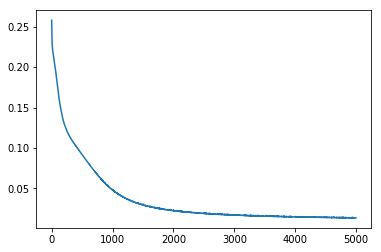

In [91]:
plt.plot(hist.history['loss'])
plt.show()

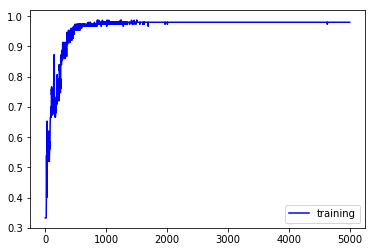

In [92]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.legend()
plt.show()

In [61]:
predictions = model.predict(train_X)

In [70]:
y_pred = lb.inverse_transform(np.round(predictions))

In [73]:
y_true = lb.inverse_transform(train_y)

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true,y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  0, 50]])

In [7]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

/home/hskimim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/hskimim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [8]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(faces.data, faces.target, test_size=0.4, random_state=0)

/home/hskimim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [9]:
train_X.shape,train_y.shape,test_X.shape,test_y.shape

((240, 4096), (240,), (160, 4096), (160,))

In [10]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
train_y = lb.fit_transform(train_y)
test_y = lb.fit_transform(test_y)

In [11]:
train_y.shape , test_y.shape

((240, 40), (160, 40))

In [115]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(0)

model = Sequential()
model.add(Dense(150, input_dim=4096, activation="sigmoid"))
model.add(Dense(40, activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.5), loss='categorical_crossentropy', metrics=["accuracy"])

In [116]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 150)               614550    
_________________________________________________________________
dense_12 (Dense)             (None, 40)                6040      
Total params: 620,590
Trainable params: 620,590
Non-trainable params: 0
_________________________________________________________________


In [117]:
%%time
hist = model.fit(train_X, train_y, 
                 epochs=1500, batch_size=100, 
                 validation_data=(test_X, test_y), 
                 verbose=2)

Train on 240 samples, validate on 160 samples
Epoch 1/1500
 - 0s - loss: 3.7560 - acc: 0.0125 - val_loss: 3.7746 - val_acc: 0.0375
Epoch 2/1500
 - 0s - loss: 3.6944 - acc: 0.0250 - val_loss: 3.7695 - val_acc: 0.0188
Epoch 3/1500
 - 0s - loss: 3.6829 - acc: 0.0292 - val_loss: 3.7574 - val_acc: 0.0188
Epoch 4/1500
 - 0s - loss: 3.6623 - acc: 0.0292 - val_loss: 3.7255 - val_acc: 0.0188
Epoch 5/1500
 - 0s - loss: 3.6429 - acc: 0.0292 - val_loss: 3.7293 - val_acc: 0.0188
Epoch 6/1500
 - 0s - loss: 3.6311 - acc: 0.0292 - val_loss: 3.7578 - val_acc: 0.0062
Epoch 7/1500
 - 0s - loss: 3.6166 - acc: 0.0375 - val_loss: 3.7269 - val_acc: 0.0062
Epoch 8/1500
 - 0s - loss: 3.6116 - acc: 0.0375 - val_loss: 3.7286 - val_acc: 0.0125
Epoch 9/1500
 - 0s - loss: 3.6053 - acc: 0.0583 - val_loss: 3.7134 - val_acc: 0.0062
Epoch 10/1500
 - 0s - loss: 3.5853 - acc: 0.0417 - val_loss: 3.7030 - val_acc: 0.0062
Epoch 11/1500
 - 0s - loss: 3.5746 - acc: 0.0375 - val_loss: 3.7289 - val_acc: 0.1000
Epoch 12/1500
 - 

Epoch 96/1500
 - 0s - loss: 1.9491 - acc: 0.4958 - val_loss: 2.0398 - val_acc: 0.4000
Epoch 97/1500
 - 0s - loss: 1.6316 - acc: 0.5958 - val_loss: 2.6360 - val_acc: 0.3313
Epoch 98/1500
 - 0s - loss: 1.8839 - acc: 0.5083 - val_loss: 2.4989 - val_acc: 0.2875
Epoch 99/1500
 - 0s - loss: 1.8417 - acc: 0.5292 - val_loss: 2.6551 - val_acc: 0.2750
Epoch 100/1500
 - 0s - loss: 2.3922 - acc: 0.2917 - val_loss: 2.9662 - val_acc: 0.2500
Epoch 101/1500
 - 0s - loss: 2.4708 - acc: 0.3083 - val_loss: 2.6934 - val_acc: 0.2187
Epoch 102/1500
 - 0s - loss: 2.1686 - acc: 0.4042 - val_loss: 2.1870 - val_acc: 0.4125
Epoch 103/1500
 - 0s - loss: 1.9181 - acc: 0.4792 - val_loss: 2.9817 - val_acc: 0.1750
Epoch 104/1500
 - 0s - loss: 2.1587 - acc: 0.3750 - val_loss: 2.1599 - val_acc: 0.4312
Epoch 105/1500
 - 0s - loss: 1.7229 - acc: 0.5375 - val_loss: 2.2431 - val_acc: 0.4062
Epoch 106/1500
 - 0s - loss: 1.6638 - acc: 0.5625 - val_loss: 2.0719 - val_acc: 0.4812
Epoch 107/1500
 - 0s - loss: 1.5385 - acc: 0.62

Epoch 191/1500
 - 0s - loss: 0.1161 - acc: 0.9958 - val_loss: 0.6354 - val_acc: 0.8812
Epoch 192/1500
 - 0s - loss: 0.0990 - acc: 1.0000 - val_loss: 0.6104 - val_acc: 0.8500
Epoch 193/1500
 - 0s - loss: 0.0986 - acc: 1.0000 - val_loss: 0.5769 - val_acc: 0.8625
Epoch 194/1500
 - 0s - loss: 0.0958 - acc: 1.0000 - val_loss: 0.5574 - val_acc: 0.8688
Epoch 195/1500
 - 0s - loss: 0.0888 - acc: 1.0000 - val_loss: 0.5673 - val_acc: 0.8688
Epoch 196/1500
 - 0s - loss: 0.0879 - acc: 1.0000 - val_loss: 0.5623 - val_acc: 0.8688
Epoch 197/1500
 - 0s - loss: 0.0868 - acc: 1.0000 - val_loss: 0.5531 - val_acc: 0.8750
Epoch 198/1500
 - 0s - loss: 0.0879 - acc: 1.0000 - val_loss: 0.5340 - val_acc: 0.9063
Epoch 199/1500
 - 0s - loss: 0.0843 - acc: 1.0000 - val_loss: 0.5392 - val_acc: 0.8875
Epoch 200/1500
 - 0s - loss: 0.0823 - acc: 1.0000 - val_loss: 0.5329 - val_acc: 0.8937
Epoch 201/1500
 - 0s - loss: 0.0839 - acc: 1.0000 - val_loss: 0.5364 - val_acc: 0.8625
Epoch 202/1500
 - 0s - loss: 0.0854 - acc: 

 - 0s - loss: 0.0345 - acc: 1.0000 - val_loss: 0.4688 - val_acc: 0.8812
Epoch 286/1500
 - 0s - loss: 0.0349 - acc: 1.0000 - val_loss: 0.4446 - val_acc: 0.9063
Epoch 287/1500
 - 0s - loss: 0.0339 - acc: 1.0000 - val_loss: 0.4490 - val_acc: 0.8937
Epoch 288/1500
 - 0s - loss: 0.0334 - acc: 1.0000 - val_loss: 0.4554 - val_acc: 0.9000
Epoch 289/1500
 - 0s - loss: 0.0332 - acc: 1.0000 - val_loss: 0.4502 - val_acc: 0.8938
Epoch 290/1500
 - 0s - loss: 0.0330 - acc: 1.0000 - val_loss: 0.4483 - val_acc: 0.9000
Epoch 291/1500
 - 0s - loss: 0.0327 - acc: 1.0000 - val_loss: 0.4428 - val_acc: 0.9063
Epoch 292/1500
 - 0s - loss: 0.0326 - acc: 1.0000 - val_loss: 0.4476 - val_acc: 0.8937
Epoch 293/1500
 - 0s - loss: 0.0326 - acc: 1.0000 - val_loss: 0.4452 - val_acc: 0.9000
Epoch 294/1500
 - 0s - loss: 0.0323 - acc: 1.0000 - val_loss: 0.4434 - val_acc: 0.8937
Epoch 295/1500
 - 0s - loss: 0.0321 - acc: 1.0000 - val_loss: 0.4457 - val_acc: 0.9000
Epoch 296/1500
 - 0s - loss: 0.0320 - acc: 1.0000 - val_lo

Epoch 380/1500
 - 0s - loss: 0.0202 - acc: 1.0000 - val_loss: 0.4146 - val_acc: 0.8937
Epoch 381/1500
 - 0s - loss: 0.0200 - acc: 1.0000 - val_loss: 0.4154 - val_acc: 0.9000
Epoch 382/1500
 - 0s - loss: 0.0199 - acc: 1.0000 - val_loss: 0.4145 - val_acc: 0.9000
Epoch 383/1500
 - 0s - loss: 0.0198 - acc: 1.0000 - val_loss: 0.4197 - val_acc: 0.9063
Epoch 384/1500
 - 0s - loss: 0.0198 - acc: 1.0000 - val_loss: 0.4198 - val_acc: 0.9000
Epoch 385/1500
 - 0s - loss: 0.0198 - acc: 1.0000 - val_loss: 0.4057 - val_acc: 0.9000
Epoch 386/1500
 - 0s - loss: 0.0197 - acc: 1.0000 - val_loss: 0.4140 - val_acc: 0.9000
Epoch 387/1500
 - 0s - loss: 0.0196 - acc: 1.0000 - val_loss: 0.4105 - val_acc: 0.9000
Epoch 388/1500
 - 0s - loss: 0.0195 - acc: 1.0000 - val_loss: 0.4110 - val_acc: 0.9000
Epoch 389/1500
 - 0s - loss: 0.0194 - acc: 1.0000 - val_loss: 0.4119 - val_acc: 0.9000
Epoch 390/1500
 - 0s - loss: 0.0193 - acc: 1.0000 - val_loss: 0.4065 - val_acc: 0.9000
Epoch 391/1500
 - 0s - loss: 0.0193 - acc: 

 - 0s - loss: 0.0145 - acc: 1.0000 - val_loss: 0.3907 - val_acc: 0.9063
Epoch 475/1500
 - 0s - loss: 0.0144 - acc: 1.0000 - val_loss: 0.3927 - val_acc: 0.9000
Epoch 476/1500
 - 0s - loss: 0.0144 - acc: 1.0000 - val_loss: 0.3901 - val_acc: 0.9000
Epoch 477/1500
 - 0s - loss: 0.0143 - acc: 1.0000 - val_loss: 0.3911 - val_acc: 0.9063
Epoch 478/1500
 - 0s - loss: 0.0143 - acc: 1.0000 - val_loss: 0.3922 - val_acc: 0.9000
Epoch 479/1500
 - 0s - loss: 0.0143 - acc: 1.0000 - val_loss: 0.3939 - val_acc: 0.9000
Epoch 480/1500
 - 0s - loss: 0.0142 - acc: 1.0000 - val_loss: 0.3932 - val_acc: 0.9063
Epoch 481/1500
 - 0s - loss: 0.0141 - acc: 1.0000 - val_loss: 0.3963 - val_acc: 0.9063
Epoch 482/1500
 - 0s - loss: 0.0141 - acc: 1.0000 - val_loss: 0.3934 - val_acc: 0.9063
Epoch 483/1500
 - 0s - loss: 0.0141 - acc: 1.0000 - val_loss: 0.3928 - val_acc: 0.9000
Epoch 484/1500
 - 0s - loss: 0.0140 - acc: 1.0000 - val_loss: 0.3922 - val_acc: 0.9063
Epoch 485/1500
 - 0s - loss: 0.0140 - acc: 1.0000 - val_lo

Epoch 569/1500
 - 0s - loss: 0.0112 - acc: 1.0000 - val_loss: 0.3784 - val_acc: 0.9125
Epoch 570/1500
 - 0s - loss: 0.0112 - acc: 1.0000 - val_loss: 0.3773 - val_acc: 0.9063
Epoch 571/1500
 - 0s - loss: 0.0112 - acc: 1.0000 - val_loss: 0.3780 - val_acc: 0.9063
Epoch 572/1500
 - 0s - loss: 0.0112 - acc: 1.0000 - val_loss: 0.3795 - val_acc: 0.9063
Epoch 573/1500
 - 0s - loss: 0.0112 - acc: 1.0000 - val_loss: 0.3826 - val_acc: 0.9063
Epoch 574/1500
 - 0s - loss: 0.0111 - acc: 1.0000 - val_loss: 0.3804 - val_acc: 0.9125
Epoch 575/1500
 - 0s - loss: 0.0111 - acc: 1.0000 - val_loss: 0.3826 - val_acc: 0.9063
Epoch 576/1500
 - 0s - loss: 0.0111 - acc: 1.0000 - val_loss: 0.3787 - val_acc: 0.9063
Epoch 577/1500
 - 0s - loss: 0.0110 - acc: 1.0000 - val_loss: 0.3771 - val_acc: 0.9125
Epoch 578/1500
 - 0s - loss: 0.0110 - acc: 1.0000 - val_loss: 0.3787 - val_acc: 0.9125
Epoch 579/1500
 - 0s - loss: 0.0109 - acc: 1.0000 - val_loss: 0.3777 - val_acc: 0.9125
Epoch 580/1500
 - 0s - loss: 0.0109 - acc: 

 - 0s - loss: 0.0092 - acc: 1.0000 - val_loss: 0.3709 - val_acc: 0.9125
Epoch 664/1500
 - 0s - loss: 0.0092 - acc: 1.0000 - val_loss: 0.3699 - val_acc: 0.9125
Epoch 665/1500
 - 0s - loss: 0.0092 - acc: 1.0000 - val_loss: 0.3706 - val_acc: 0.9125
Epoch 666/1500
 - 0s - loss: 0.0092 - acc: 1.0000 - val_loss: 0.3719 - val_acc: 0.9188
Epoch 667/1500
 - 0s - loss: 0.0091 - acc: 1.0000 - val_loss: 0.3727 - val_acc: 0.9063
Epoch 668/1500
 - 0s - loss: 0.0091 - acc: 1.0000 - val_loss: 0.3727 - val_acc: 0.9063
Epoch 669/1500
 - 0s - loss: 0.0091 - acc: 1.0000 - val_loss: 0.3720 - val_acc: 0.9125
Epoch 670/1500
 - 0s - loss: 0.0091 - acc: 1.0000 - val_loss: 0.3734 - val_acc: 0.9125
Epoch 671/1500
 - 0s - loss: 0.0091 - acc: 1.0000 - val_loss: 0.3748 - val_acc: 0.9125
Epoch 672/1500
 - 0s - loss: 0.0090 - acc: 1.0000 - val_loss: 0.3727 - val_acc: 0.9188
Epoch 673/1500
 - 0s - loss: 0.0090 - acc: 1.0000 - val_loss: 0.3713 - val_acc: 0.9188
Epoch 674/1500
 - 0s - loss: 0.0090 - acc: 1.0000 - val_lo

Epoch 758/1500
 - 0s - loss: 0.0078 - acc: 1.0000 - val_loss: 0.3637 - val_acc: 0.9063
Epoch 759/1500
 - 0s - loss: 0.0078 - acc: 1.0000 - val_loss: 0.3662 - val_acc: 0.9188
Epoch 760/1500
 - 0s - loss: 0.0078 - acc: 1.0000 - val_loss: 0.3654 - val_acc: 0.9125
Epoch 761/1500
 - 0s - loss: 0.0077 - acc: 1.0000 - val_loss: 0.3654 - val_acc: 0.9188
Epoch 762/1500
 - 0s - loss: 0.0077 - acc: 1.0000 - val_loss: 0.3653 - val_acc: 0.9188
Epoch 763/1500
 - 0s - loss: 0.0077 - acc: 1.0000 - val_loss: 0.3630 - val_acc: 0.9188
Epoch 764/1500
 - 0s - loss: 0.0077 - acc: 1.0000 - val_loss: 0.3622 - val_acc: 0.9125
Epoch 765/1500
 - 0s - loss: 0.0077 - acc: 1.0000 - val_loss: 0.3621 - val_acc: 0.9125
Epoch 766/1500
 - 0s - loss: 0.0077 - acc: 1.0000 - val_loss: 0.3603 - val_acc: 0.9125
Epoch 767/1500
 - 0s - loss: 0.0077 - acc: 1.0000 - val_loss: 0.3619 - val_acc: 0.9125
Epoch 768/1500
 - 0s - loss: 0.0076 - acc: 1.0000 - val_loss: 0.3627 - val_acc: 0.9188
Epoch 769/1500
 - 0s - loss: 0.0076 - acc: 

 - 0s - loss: 0.0067 - acc: 1.0000 - val_loss: 0.3587 - val_acc: 0.9188
Epoch 853/1500
 - 0s - loss: 0.0067 - acc: 1.0000 - val_loss: 0.3598 - val_acc: 0.9188
Epoch 854/1500
 - 0s - loss: 0.0067 - acc: 1.0000 - val_loss: 0.3601 - val_acc: 0.9188
Epoch 855/1500
 - 0s - loss: 0.0067 - acc: 1.0000 - val_loss: 0.3595 - val_acc: 0.9188
Epoch 856/1500
 - 0s - loss: 0.0067 - acc: 1.0000 - val_loss: 0.3601 - val_acc: 0.9188
Epoch 857/1500
 - 0s - loss: 0.0067 - acc: 1.0000 - val_loss: 0.3588 - val_acc: 0.9188
Epoch 858/1500
 - 0s - loss: 0.0067 - acc: 1.0000 - val_loss: 0.3585 - val_acc: 0.9188
Epoch 859/1500
 - 0s - loss: 0.0067 - acc: 1.0000 - val_loss: 0.3576 - val_acc: 0.9125
Epoch 860/1500
 - 0s - loss: 0.0067 - acc: 1.0000 - val_loss: 0.3575 - val_acc: 0.9063
Epoch 861/1500
 - 0s - loss: 0.0066 - acc: 1.0000 - val_loss: 0.3576 - val_acc: 0.9188
Epoch 862/1500
 - 0s - loss: 0.0066 - acc: 1.0000 - val_loss: 0.3565 - val_acc: 0.9125
Epoch 863/1500
 - 0s - loss: 0.0066 - acc: 1.0000 - val_lo

Epoch 947/1500
 - 0s - loss: 0.0059 - acc: 1.0000 - val_loss: 0.3557 - val_acc: 0.9188
Epoch 948/1500
 - 0s - loss: 0.0059 - acc: 1.0000 - val_loss: 0.3550 - val_acc: 0.9188
Epoch 949/1500
 - 0s - loss: 0.0059 - acc: 1.0000 - val_loss: 0.3545 - val_acc: 0.9125
Epoch 950/1500
 - 0s - loss: 0.0059 - acc: 1.0000 - val_loss: 0.3560 - val_acc: 0.9188
Epoch 951/1500
 - 0s - loss: 0.0059 - acc: 1.0000 - val_loss: 0.3562 - val_acc: 0.9188
Epoch 952/1500
 - 0s - loss: 0.0059 - acc: 1.0000 - val_loss: 0.3543 - val_acc: 0.9063
Epoch 953/1500
 - 0s - loss: 0.0059 - acc: 1.0000 - val_loss: 0.3536 - val_acc: 0.9125
Epoch 954/1500
 - 0s - loss: 0.0059 - acc: 1.0000 - val_loss: 0.3552 - val_acc: 0.9125
Epoch 955/1500
 - 0s - loss: 0.0059 - acc: 1.0000 - val_loss: 0.3535 - val_acc: 0.9125
Epoch 956/1500
 - 0s - loss: 0.0058 - acc: 1.0000 - val_loss: 0.3537 - val_acc: 0.9125
Epoch 957/1500
 - 0s - loss: 0.0058 - acc: 1.0000 - val_loss: 0.3542 - val_acc: 0.9125
Epoch 958/1500
 - 0s - loss: 0.0058 - acc: 

Epoch 1041/1500
 - 0s - loss: 0.0053 - acc: 1.0000 - val_loss: 0.3506 - val_acc: 0.9125
Epoch 1042/1500
 - 0s - loss: 0.0053 - acc: 1.0000 - val_loss: 0.3517 - val_acc: 0.9125
Epoch 1043/1500
 - 0s - loss: 0.0053 - acc: 1.0000 - val_loss: 0.3511 - val_acc: 0.9188
Epoch 1044/1500
 - 0s - loss: 0.0053 - acc: 1.0000 - val_loss: 0.3503 - val_acc: 0.9125
Epoch 1045/1500
 - 0s - loss: 0.0053 - acc: 1.0000 - val_loss: 0.3514 - val_acc: 0.9125
Epoch 1046/1500
 - 0s - loss: 0.0053 - acc: 1.0000 - val_loss: 0.3509 - val_acc: 0.9125
Epoch 1047/1500
 - 0s - loss: 0.0052 - acc: 1.0000 - val_loss: 0.3499 - val_acc: 0.9125
Epoch 1048/1500
 - 0s - loss: 0.0052 - acc: 1.0000 - val_loss: 0.3495 - val_acc: 0.9125
Epoch 1049/1500
 - 0s - loss: 0.0052 - acc: 1.0000 - val_loss: 0.3483 - val_acc: 0.9063
Epoch 1050/1500
 - 0s - loss: 0.0052 - acc: 1.0000 - val_loss: 0.3492 - val_acc: 0.9125
Epoch 1051/1500
 - 0s - loss: 0.0052 - acc: 1.0000 - val_loss: 0.3499 - val_acc: 0.9125
Epoch 1052/1500
 - 0s - loss: 0.

 - 0s - loss: 0.0048 - acc: 1.0000 - val_loss: 0.3485 - val_acc: 0.9125
Epoch 1135/1500
 - 0s - loss: 0.0048 - acc: 1.0000 - val_loss: 0.3476 - val_acc: 0.9125
Epoch 1136/1500
 - 0s - loss: 0.0048 - acc: 1.0000 - val_loss: 0.3468 - val_acc: 0.9125
Epoch 1137/1500
 - 0s - loss: 0.0048 - acc: 1.0000 - val_loss: 0.3470 - val_acc: 0.9125
Epoch 1138/1500
 - 0s - loss: 0.0048 - acc: 1.0000 - val_loss: 0.3480 - val_acc: 0.9125
Epoch 1139/1500
 - 0s - loss: 0.0048 - acc: 1.0000 - val_loss: 0.3473 - val_acc: 0.9125
Epoch 1140/1500
 - 0s - loss: 0.0047 - acc: 1.0000 - val_loss: 0.3469 - val_acc: 0.9125
Epoch 1141/1500
 - 0s - loss: 0.0047 - acc: 1.0000 - val_loss: 0.3478 - val_acc: 0.9125
Epoch 1142/1500
 - 0s - loss: 0.0047 - acc: 1.0000 - val_loss: 0.3467 - val_acc: 0.9125
Epoch 1143/1500
 - 0s - loss: 0.0047 - acc: 1.0000 - val_loss: 0.3468 - val_acc: 0.9125
Epoch 1144/1500
 - 0s - loss: 0.0047 - acc: 1.0000 - val_loss: 0.3467 - val_acc: 0.9125
Epoch 1145/1500
 - 0s - loss: 0.0047 - acc: 1.00

Epoch 1228/1500
 - 0s - loss: 0.0044 - acc: 1.0000 - val_loss: 0.3454 - val_acc: 0.9125
Epoch 1229/1500
 - 0s - loss: 0.0043 - acc: 1.0000 - val_loss: 0.3454 - val_acc: 0.9125
Epoch 1230/1500
 - 0s - loss: 0.0043 - acc: 1.0000 - val_loss: 0.3457 - val_acc: 0.9125
Epoch 1231/1500
 - 0s - loss: 0.0043 - acc: 1.0000 - val_loss: 0.3451 - val_acc: 0.9125
Epoch 1232/1500
 - 0s - loss: 0.0043 - acc: 1.0000 - val_loss: 0.3451 - val_acc: 0.9125
Epoch 1233/1500
 - 0s - loss: 0.0043 - acc: 1.0000 - val_loss: 0.3450 - val_acc: 0.9125
Epoch 1234/1500
 - 0s - loss: 0.0043 - acc: 1.0000 - val_loss: 0.3444 - val_acc: 0.9125
Epoch 1235/1500
 - 0s - loss: 0.0043 - acc: 1.0000 - val_loss: 0.3434 - val_acc: 0.9125
Epoch 1236/1500
 - 0s - loss: 0.0043 - acc: 1.0000 - val_loss: 0.3432 - val_acc: 0.9125
Epoch 1237/1500
 - 0s - loss: 0.0043 - acc: 1.0000 - val_loss: 0.3437 - val_acc: 0.9125
Epoch 1238/1500
 - 0s - loss: 0.0043 - acc: 1.0000 - val_loss: 0.3446 - val_acc: 0.9125
Epoch 1239/1500
 - 0s - loss: 0.

 - 0s - loss: 0.0040 - acc: 1.0000 - val_loss: 0.3422 - val_acc: 0.9125
Epoch 1322/1500
 - 0s - loss: 0.0040 - acc: 1.0000 - val_loss: 0.3422 - val_acc: 0.9125
Epoch 1323/1500
 - 0s - loss: 0.0040 - acc: 1.0000 - val_loss: 0.3429 - val_acc: 0.9125
Epoch 1324/1500
 - 0s - loss: 0.0040 - acc: 1.0000 - val_loss: 0.3436 - val_acc: 0.9125
Epoch 1325/1500
 - 0s - loss: 0.0040 - acc: 1.0000 - val_loss: 0.3439 - val_acc: 0.9125
Epoch 1326/1500
 - 0s - loss: 0.0040 - acc: 1.0000 - val_loss: 0.3437 - val_acc: 0.9125
Epoch 1327/1500
 - 0s - loss: 0.0040 - acc: 1.0000 - val_loss: 0.3437 - val_acc: 0.9125
Epoch 1328/1500
 - 0s - loss: 0.0040 - acc: 1.0000 - val_loss: 0.3427 - val_acc: 0.9125
Epoch 1329/1500
 - 0s - loss: 0.0040 - acc: 1.0000 - val_loss: 0.3420 - val_acc: 0.9125
Epoch 1330/1500
 - 0s - loss: 0.0040 - acc: 1.0000 - val_loss: 0.3427 - val_acc: 0.9125
Epoch 1331/1500
 - 0s - loss: 0.0040 - acc: 1.0000 - val_loss: 0.3424 - val_acc: 0.9125
Epoch 1332/1500
 - 0s - loss: 0.0040 - acc: 1.00

Epoch 1415/1500
 - 0s - loss: 0.0037 - acc: 1.0000 - val_loss: 0.3408 - val_acc: 0.9125
Epoch 1416/1500
 - 0s - loss: 0.0037 - acc: 1.0000 - val_loss: 0.3409 - val_acc: 0.9125
Epoch 1417/1500
 - 0s - loss: 0.0037 - acc: 1.0000 - val_loss: 0.3415 - val_acc: 0.9125
Epoch 1418/1500
 - 0s - loss: 0.0037 - acc: 1.0000 - val_loss: 0.3419 - val_acc: 0.9125
Epoch 1419/1500
 - 0s - loss: 0.0037 - acc: 1.0000 - val_loss: 0.3404 - val_acc: 0.9125
Epoch 1420/1500
 - 0s - loss: 0.0037 - acc: 1.0000 - val_loss: 0.3406 - val_acc: 0.9125
Epoch 1421/1500
 - 0s - loss: 0.0037 - acc: 1.0000 - val_loss: 0.3411 - val_acc: 0.9125
Epoch 1422/1500
 - 0s - loss: 0.0037 - acc: 1.0000 - val_loss: 0.3404 - val_acc: 0.9125
Epoch 1423/1500
 - 0s - loss: 0.0037 - acc: 1.0000 - val_loss: 0.3406 - val_acc: 0.9125
Epoch 1424/1500
 - 0s - loss: 0.0037 - acc: 1.0000 - val_loss: 0.3409 - val_acc: 0.9125
Epoch 1425/1500
 - 0s - loss: 0.0037 - acc: 1.0000 - val_loss: 0.3412 - val_acc: 0.9125
Epoch 1426/1500
 - 0s - loss: 0.

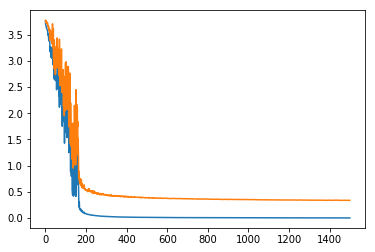

In [118]:
import matplotlib.pylab as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

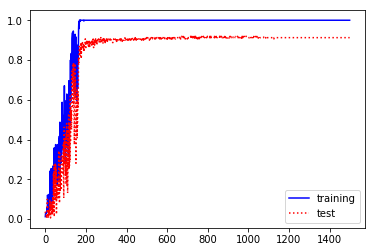

In [119]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [120]:
np.max(hist.history['acc'])

1.0

In [121]:
np.max(hist.history['val_acc'])

0.9187500178813934